In [172]:
# Basic Libraries
# %pylab inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import RANSACRegressor, LinearRegression
sb.set() # set the default Seaborn style for graphics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sb.set(font_scale = 1.3)

In [173]:
rawData1 = pd.read_csv('weapon.csv')
rawData1.head()
rawData1.rename(columns={'|': 'itemid', '|__name_enus': 'name',  
                        '|__quality': 'quality', '|__icon': 'icon', 
                        '|__screenshot': 'screenshot', '|__jsonequip__cooldown': 'cooldown', 
                        '|__jsonequip__arcres': 'arcres', '|__jsonequip__armor': 'armor', 
                        '|__jsonequip__agi': 'agi', '|__jsonequip__atkpwr': 'atkpwr', 
                        '|__jsonequip__avgbuyout': 'avgbuyout', '|__jsonequip__buyprice': 'buyprice', 
                        '|__jsonequip__def': 'def', '|__jsonequip__classes': 'classes', 
                        '|__jsonequip__displayid': 'displayid', '|__jsonequip__dmgmax1': 'dmgmax1', 
                        '|__jsonequip__dmgmin1': 'dmgmin1', '|__jsonequip__dmgrange': 'dmgrange', 
                        '|__jsonequip__dmgtype1': 'dmgtype1', '|__jsonequip__dps': 'dps', 
                        '|__jsonequip__dura': 'dura', '|__jsonequip__manargn': 'manargn', 
                        '|__jsonequip__healthrgn': 'healthrgn', '|__jsonequip__int': 'int', 
                        '|__jsonequip__firres': 'firres', '|__jsonequip__frores': 'frores', 
                        '|__jsonequip__holsplpwr': 'holsplpwr', '|__jsonequip__maxcount': 'maxcount',
                        '|__jsonequip__mlecritstrkpct': 'mlecritstrkpct', '|__jsonequip__mledmgmax': 'mledmgmax',
                        '|__jsonequip__mledmgmin': 'mledmgmin', '|__jsonequip__mledps': 'mledps',
                        '|__jsonequip__mlehitpct': 'mlehitpct', '|__jsonequip__mlespeed': 'mlespeed',
                        '|__jsonequip__races': 'races', '|__jsonequip__reqskill': 'reqskill',
                        '|__jsonequip__reqskillrank': 'reqskillrank', '|__jsonequip__natres': 'natres',
                        '|__jsonequip__parrypct': 'parrypct', '|__jsonequip__reqlevel': 'reqlevel',
                        '|__jsonequip__rgdcritstrkpct': 'rgdcritstrkpct', '|__jsonequip__rgdhitpct': 'rgdhitpct',
                        '|__jsonequip__sellprice': 'sellprice', '|__jsonequip__shares': 'shares',
                        '|__jsonequip__sheathtype': 'sheathtype', 
                        '|__jsonequip__slotbak': 'slotbak', '|__jsonequip__speed': 'speed', 
                        '|__jsonequip__splcritstrkpct': 'splcritstrkpct', '|__jsonequip__splpwr': 'splpwr', 
                        '|__jsonequip__spi': 'spi', '|__jsonequip__splheal': 'splheal', 
                        '|__jsonequip__sta': 'sta', '|__jsonequip__str': 'str', 
                        '|__attainable': 'attainable', '|__flags2': 'flags2',
                       }, inplace=True)
rawData1.head()

,itemid,name,quality,icon,screenshot,cooldown,arcres,armor,agi,atkpwr,avgbuyout,buyprice,def,classes,displayid,dmgmax1,dmgmin1,dmgrange,dmgtype1,dps,dura,manargn,healthrgn,int,firres,frores,holsplpwr,maxcount,mlecritstrkpct,mledmgmax,mledmgmin,mledps,mlehitpct,mlespeed,races,reqskill,reqskillrank,natres,parrypct,reqlevel,rgdcritstrkpct,rgdhitpct,sellprice,shares,sheathtype,slotbak,speed,splcritstrkpct,splpwr,spi,splheal,sta,str,attainable,flags2
0,6975,Whirlwind Axe,3,inv_axe_12,242600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22734,154.0,102.0,1,0,35.56,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,102.0,35.56,NaN,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16766,NaN,1,17,3.6,NaN,NaN,NaN,NaN,14.0,15.0,0,8192
1,7717,Ravager,3,inv_weapon_halberd_05,82029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22221,157.0,104.0,1,0,37.29,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,104.0,37.29,NaN,3.5,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,18923,NaN,1,17,3.5,NaN,NaN,NaN,NaN,NaN,NaN,0,8192
2,3853,Moonsteel Broadsword,2,inv_sword_25,69983,NaN,NaN,NaN,NaN,NaN,39800.0,NaN,NaN,NaN,7324,83.0,55.0,1,0,24.64,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,55.0,24.64,NaN,2.8,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,10153,NaN,1,17,2.8,NaN,NaN,12.0,NaN,4.0,NaN,0,8192
3,6687,Corpsemaker,3,inv_weapon_halbard_01,64899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22217,132.0,88.0,1,0,28.95,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,88.0,28.95,NaN,3.8,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,9930,NaN,1,17,3.8,NaN,NaN,NaN,NaN,8.0,15.0,0,8192
4,12784,Arcanite Reaper,3,inv_axe_09,89138,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,23904,256.0,153.0,1,0,53.82,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,153.0,53.82,NaN,3.8,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,73036,NaN,1,17,3.8,NaN,NaN,NaN,NaN,13.0,NaN,0,8192


In [174]:
rawData2 = pd.read_csv('weaponsupp.csv')
rawData2.head()

,armor,classs,commondrop,displayid,dps,flags2,id,level,name,reqclass,reqlevel,reqrace,side,slot,slotbak,source__001,source__002,sourcemore__bd,sourcemore__dd,sourcemore__c,sourcemore__icon,sourcemore__c2,sourcemore__n,sourcemore__s,sourcemore__t,sourcemore__ti,sourcemore__z,speed,subclass,firstseenpatch,popularity,contentPhase
0,NaN,2,NaN,22734,35.56,8192,6975,40,5Whirlwind Axe,1.0,30.0,NaN,NaN,17,17,4.0,NaN,NaN,NaN,-81.0,NaN,4.0,Whirlwind Weapon,NaN,5.0,1792.0,NaN,3.6,1,0,15979,1
1,NaN,2,NaN,22221,37.29,8192,7717,42,5Ravager,NaN,37.0,NaN,NaN,17,17,2.0,NaN,NaN,-1.0,NaN,NaN,NaN,Herod,NaN,1.0,3975.0,796.0,3.5,1,0,11434,1
2,NaN,2,NaN,7324,24.64,8192,3853,36,6Moonsteel Broadsword,NaN,31.0,NaN,NaN,17,17,1.0,NaN,NaN,NaN,11.0,inv_sword_25,NaN,Moonsteel Broadsword,164.0,6.0,3496.0,NaN,2.8,8,0,9882,1
3,NaN,2,NaN,22217,28.95,8192,6687,34,5Corpsemaker,NaN,29.0,NaN,NaN,17,17,2.0,NaN,NaN,-1.0,NaN,NaN,NaN,Overlord Ramtusk,NaN,1.0,4420.0,491.0,3.8,1,0,8119,1
4,NaN,2,NaN,23904,53.82,8192,12784,63,5Arcanite Reaper,NaN,58.0,NaN,NaN,17,17,1.0,NaN,NaN,NaN,11.0,inv_axe_09,NaN,Arcanite Reaper,164.0,6.0,16994.0,NaN,3.8,1,0,7806,1


In [175]:
weaponData1 = pd.DataFrame(rawData1[['name', 'quality', 'dps', 'speed', 'rgdcritstrkpct','rgdhitpct', 'atkpwr', 'str', 'agi']])
weaponData1.head()

weaponData2 = pd.DataFrame(rawData2[['level', 'reqclass', 'reqlevel', 'subclass']])
weaponData2.head()
# 'level', 'reqclass', 'reqlevel'

weaponData = weaponData1.join(weaponData2)
weaponData.rename(columns={'rgdcritstrkpct':'critstrkpct', 'rgdhitpct':'hitpct', 'subclass':'type'}, inplace=True)
weaponData.head(100)

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,agi,level,reqclass,reqlevel,type
0,Whirlwind Axe,3,35.56,3.6,NaN,NaN,NaN,15.0,NaN,40,1.0,30.0,1
1,Ravager,3,37.29,3.5,NaN,NaN,NaN,NaN,NaN,42,NaN,37.0,1
2,Moonsteel Broadsword,2,24.64,2.8,NaN,NaN,NaN,NaN,NaN,36,NaN,31.0,8
3,Corpsemaker,3,28.95,3.8,NaN,NaN,NaN,15.0,NaN,34,NaN,29.0,1
4,Arcanite Reaper,3,53.82,3.8,NaN,NaN,62.0,NaN,NaN,63,NaN,58.0,1
5,"Sulfuras, Hand of Ragnaros",5,80.41,3.7,NaN,NaN,NaN,12.0,NaN,80,NaN,60.0,5
6,Manual Crowd Pummeler,3,29.00,2.0,NaN,NaN,NaN,16.0,5.0,34,NaN,29.0,5
7,Verigan's Fist,3,25.63,3.2,NaN,NaN,NaN,NaN,NaN,31,2.0,20.0,5
8,Sul'thraze the Lasher,4,52.12,2.6,NaN,NaN,NaN,NaN,NaN,55,NaN,50.0,8
9,Bonebiter,3,38.82,3.4,NaN,NaN,NaN,20.0,NaN,44,NaN,34.0,1


In [176]:
weaponData.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
name           418 non-null object
quality        418 non-null int64
dps            418 non-null float64
speed          418 non-null float64
critstrkpct    28 non-null float64
hitpct         8 non-null float64
atkpwr         16 non-null float64
str            133 non-null float64
agi            36 non-null float64
level          418 non-null int64
reqclass       5 non-null float64
reqlevel       404 non-null float64
type           418 non-null int64
dtypes: float64(9), int64(3), object(1)
memory usage: 42.6+ KB


In [177]:
weaponData = weaponData.fillna(0)
weaponData.head()  


,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,agi,level,reqclass,reqlevel,type
0,Whirlwind Axe,3,35.56,3.6,0.0,0.0,0.0,15.0,0.0,40,1.0,30.0,1
1,Ravager,3,37.29,3.5,0.0,0.0,0.0,0.0,0.0,42,0.0,37.0,1
2,Moonsteel Broadsword,2,24.64,2.8,0.0,0.0,0.0,0.0,0.0,36,0.0,31.0,8
3,Corpsemaker,3,28.95,3.8,0.0,0.0,0.0,15.0,0.0,34,0.0,29.0,1
4,Arcanite Reaper,3,53.82,3.8,0.0,0.0,62.0,0.0,0.0,63,0.0,58.0,1


In [178]:
weaponData[['reqclass','reqlevel']] = weaponData[['reqclass','reqlevel']].astype(int)
weaponData.head()

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,agi,level,reqclass,reqlevel,type
0,Whirlwind Axe,3,35.56,3.6,0.0,0.0,0.0,15.0,0.0,40,1,30,1
1,Ravager,3,37.29,3.5,0.0,0.0,0.0,0.0,0.0,42,0,37,1
2,Moonsteel Broadsword,2,24.64,2.8,0.0,0.0,0.0,0.0,0.0,36,0,31,8
3,Corpsemaker,3,28.95,3.8,0.0,0.0,0.0,15.0,0.0,34,0,29,1
4,Arcanite Reaper,3,53.82,3.8,0.0,0.0,62.0,0.0,0.0,63,0,58,1


In [179]:
weaponData['type'] = weaponData['type'].map({1:'Two-handed Axe', 5:'Mace', 6:'Polearm', 8:'Two-handed Sword'})
weaponData.head()

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,agi,level,reqclass,reqlevel,type
0,Whirlwind Axe,3,35.56,3.6,0.0,0.0,0.0,15.0,0.0,40,1,30,Two-handed Axe
1,Ravager,3,37.29,3.5,0.0,0.0,0.0,0.0,0.0,42,0,37,Two-handed Axe
2,Moonsteel Broadsword,2,24.64,2.8,0.0,0.0,0.0,0.0,0.0,36,0,31,Two-handed Sword
3,Corpsemaker,3,28.95,3.8,0.0,0.0,0.0,15.0,0.0,34,0,29,Two-handed Axe
4,Arcanite Reaper,3,53.82,3.8,0.0,0.0,62.0,0.0,0.0,63,0,58,Two-handed Axe


In [180]:
dph = weaponData.speed * weaponData.dps
weaponData.insert(loc=8, column='dph', value=dph)
weaponData.head()

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,dph,agi,level,reqclass,reqlevel,type
0,Whirlwind Axe,3,35.56,3.6,0.0,0.0,0.0,15.0,128.016,0.0,40,1,30,Two-handed Axe
1,Ravager,3,37.29,3.5,0.0,0.0,0.0,0.0,130.515,0.0,42,0,37,Two-handed Axe
2,Moonsteel Broadsword,2,24.64,2.8,0.0,0.0,0.0,0.0,68.992,0.0,36,0,31,Two-handed Sword
3,Corpsemaker,3,28.95,3.8,0.0,0.0,0.0,15.0,110.010,0.0,34,0,29,Two-handed Axe
4,Arcanite Reaper,3,53.82,3.8,0.0,0.0,62.0,0.0,204.516,0.0,63,0,58,Two-handed Axe


In [181]:
weaponData = weaponData.drop(weaponData[weaponData['reqclass']>1].index)

for index, row in weaponData.iterrows():
    if row['reqlevel'] == 0:
        if row['level'] <= 5:
            weaponData.at[index,'reqlevel'] = 1
        elif row['level'] >= 66:
            weaponData.at[index,'reqlevel'] = 60
        else:
            tmp = row['level'] - 5
            weaponData.at[index,'reqlevel'] = tmp
                        
        

Number of Types : 4
Mace                128
Two-handed Sword    126
Two-handed Axe      119
Polearm              44
Name: type, dtype: int64


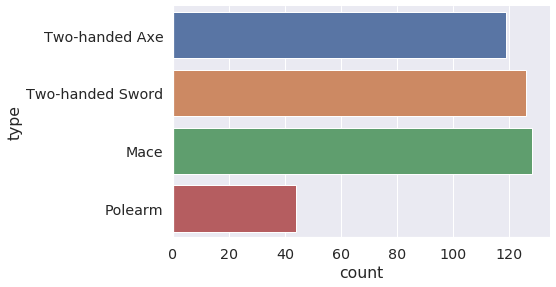

In [182]:
# Types in the Dataset
print("Number of Types :", len(weaponData["type"].unique()))

# Two-handed weapons in each type
print(weaponData["type"].value_counts())
sb.catplot(y = "type", data = weaponData, kind = "count", height=4, aspect=2)

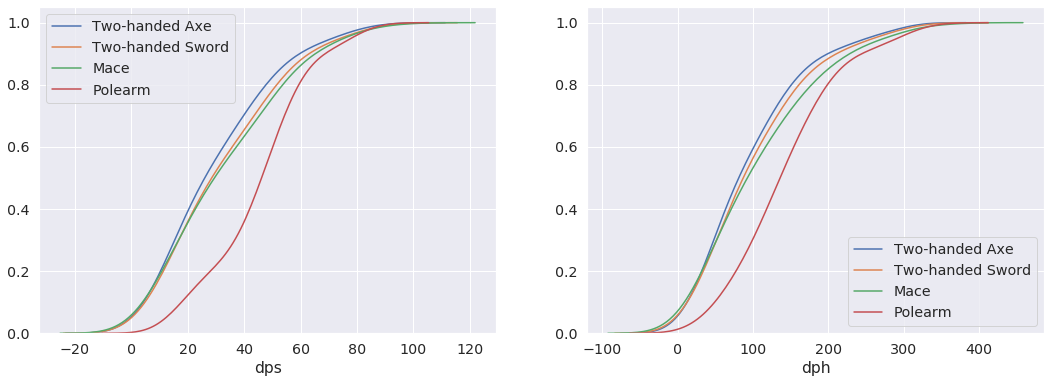

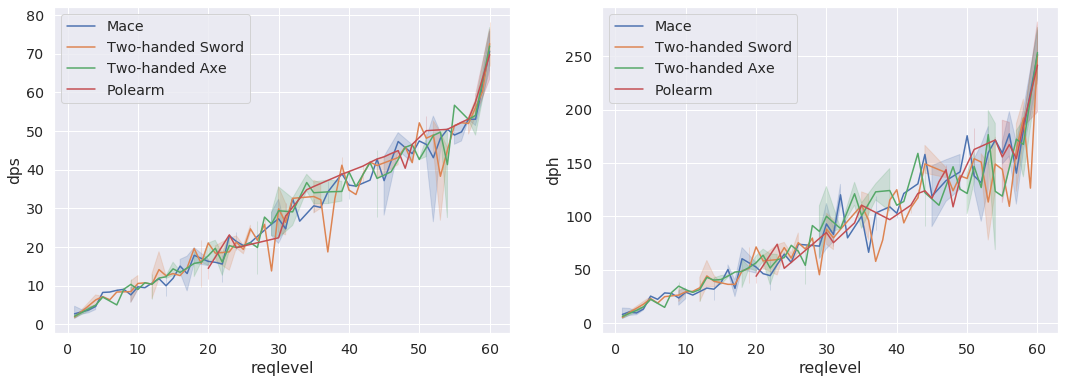

In [183]:
# fig, axis = plt.subplots(2, 2, figsize(2, 2))
# colors = ["r", "g", "b", "m"]
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
uniqueVals = weaponData["type"].unique()
types = [weaponData[weaponData["type"]== val] for val in uniqueVals]

for i, t in enumerate(['dps', 'dph']):
    for idx, weaponType in enumerate(types):
        sb.distplot(weaponType[t], ax=axis[i % 2], hist=False, kde_kws=dict(cumulative=True), label=uniqueVals[idx])
        

weaponDataByLevel = weaponData.sort_values('reqlevel')

fig, axis = plt.subplots(1, 2, figsize=(18, 6))
uniqueVals = weaponDataByLevel["type"].unique()
types = [weaponDataByLevel[weaponDataByLevel["type"]== val] for val in uniqueVals]

for i, t in enumerate(['dps', 'dph']):
    for idx, weaponType in enumerate(types):
        sb.lineplot(x=weaponType['reqlevel'], y=weaponType[t], data=weaponType, ax=axis[i % 2], label=uniqueVals[idx])


In [184]:

        
#plt.show(block=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 363
Data columns (total 14 columns):
name           190 non-null object
quality        190 non-null int64
dps            190 non-null float64
speed          190 non-null float64
critstrkpct    190 non-null float64
hitpct         190 non-null float64
atkpwr         190 non-null float64
str            190 non-null float64
dph            190 non-null float64
agi            190 non-null float64
level          190 non-null int64
reqclass       190 non-null int64
reqlevel       190 non-null int64
type           190 non-null object
dtypes: float64(8), int64(4), object(2)
memory usage: 22.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 66 to 363
Data columns (total 14 columns):
name           190 non-null object
quality        190 non-null int64
dps            190 non-null float64
speed          190 non-null float64
critstrkpct    190 non-null float64
hitpct         190 non-null float64
atkpwr         190 

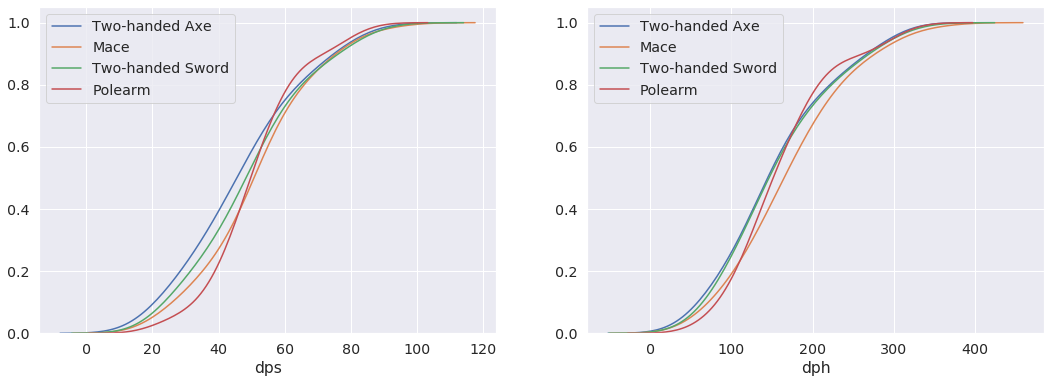

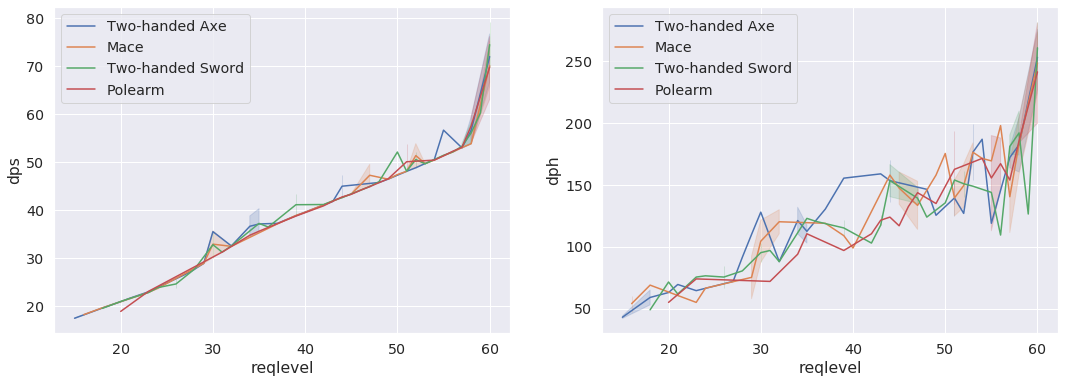

In [185]:
# rareWeaponData = weaponData[weaponData["quality"] == 3]
rareWeaponData = weaponData.query('quality== ["3", "4"]')
rareWeaponData.info()

fig, axis = plt.subplots(1, 2, figsize=(18, 6))
uniqueVals = rareWeaponData["type"].unique()
types = [rareWeaponData[rareWeaponData["type"]== val] for val in uniqueVals]

for i, t in enumerate(['dps', 'dph']):
    for idx, WeaponData in enumerate(types):
        sb.distplot(WeaponData[t], ax=axis[i % 2], hist=False, kde_kws=dict(cumulative=True), label=uniqueVals[idx])

rareWeaponDataByLevel = rareWeaponData.sort_values('reqlevel')
rareWeaponDataByLevel.info()
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
uniqueVals = rareWeaponDataByLevel["type"].unique()
types = [rareWeaponDataByLevel[rareWeaponDataByLevel["type"]== val] for val in uniqueVals]

for i, t in enumerate(['dps', 'dph']):
    for idx, weaponType in enumerate(types):
        sb.lineplot(x=weaponType['reqlevel'], y=weaponType[t], data=weaponType, ax=axis[i % 2], label=uniqueVals[idx],alpha=1)

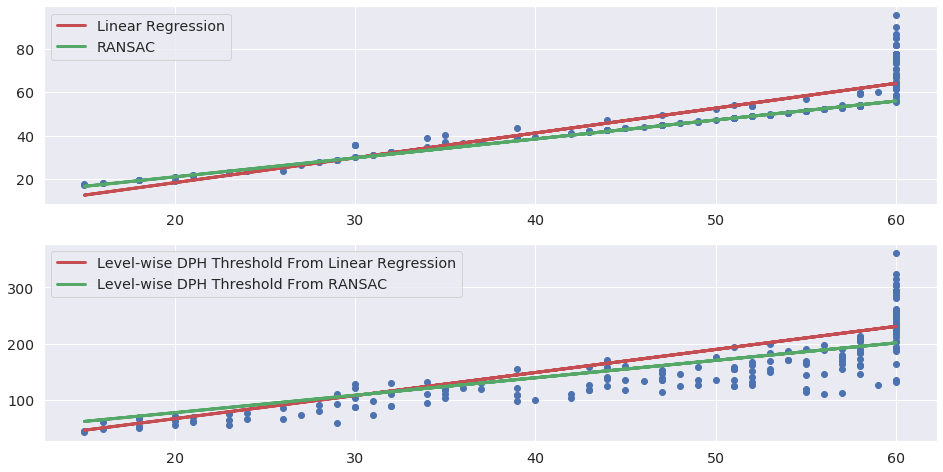

In [186]:
X = rareWeaponData[['reqlevel']]
linreg = LinearRegression()
ranreg = RANSACRegressor(LinearRegression(), max_trials = 1000, stop_probability = 0.9999, residual_threshold=1)
baseSpeed = 3.6
f, axes = plt.subplots(2, 1, figsize=(16, 8))

Y = rareWeaponData[['dps']]
linreg.fit(X, Y)
ranreg.fit(X, Y)

reglineX = X
reglineY = linreg.intercept_ + linreg.coef_ * X
reglineYRansac = ranreg.estimator_.intercept_ + ranreg.estimator_.coef_ * X

axes[0].scatter(X, Y)
axes[0].plot(reglineX, reglineY, 'r-', linewidth = 3)
axes[0].plot(reglineX, reglineYRansac, 'g-', linewidth = 3)
axes[0].legend(['Linear Regression', 'RANSAC'], loc="best")

reglinePredFromRegDps = baseSpeed * reglineY
reglinePredFromRansacDps = baseSpeed * reglineYRansac


Y = rareWeaponData[['dph']]
axes[1].scatter(X, Y)
axes[1].plot(reglineX, reglinePredFromRegDps, 'r-', linewidth = 3)  
axes[1].plot(reglineX, reglinePredFromDps, 'g-', linewidth = 3)  
axes[1].legend(['Level-wise DPH Threshold From Linear Regression', 'Level-wise DPH Threshold From RANSAC'], loc="best")

In [187]:
keys = list(range(1,61))
values = (ranreg.estimator_.intercept_ + ranreg.estimator_.coef_[0] * keys) * baseSpeed
Benchmark = dict(zip(keys, values))

rareWeaponData.loc[:,'baseDPH'] = rareWeaponData.loc[:,'reqlevel'].map(Benchmark)
rareWeaponData.loc[:, 'diffDPH'] = rareWeaponData.loc[:, 'dph'] - rareWeaponData.loc[:,'baseDPH']
rareWeaponData.loc[:, 'levelsup'] = ((rareWeaponData.loc[:, 'diffDPH'] / baseSpeed))/ ranreg.estimator_.coef_[0]

sortedWeaponData = rareWeaponData.sort_values(['reqlevel', 'levelsup'], ascending=[True, False])
sortedWeaponData.to_csv('result.csv')

/home/su/anaconda3/envs/wow/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/su/anaconda3/envs/wow/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [188]:
sortedWeaponData.head()
mask1 = sortedWeaponData.loc[:,'levelsup'] > 0
mask2 = sortedWeaponData.loc[:,'reqlevel'] < 60
mask = mask1 & mask2
sortedWeaponData = sortedWeaponData[mask]
sortedWeaponData.head()

occur = sortedWeaponData.groupby('reqlevel').cumcount()
sortedWeaponData.insert(loc=16, column='occur', value=occur)
sortedWeaponData.head()

,name,quality,dps,speed,critstrkpct,hitpct,atkpwr,str,dph,agi,level,reqclass,reqlevel,type,baseDPH,diffDPH,occur,levelsup
3,Corpsemaker,3,28.95,3.8,0.0,0.0,0.0,15.0,110.010,0.0,34,0,29,Two-handed Axe,104.117145,5.892855,0,1.879314
0,Whirlwind Axe,3,35.56,3.6,0.0,0.0,0.0,15.0,128.016,0.0,40,1,30,Two-handed Axe,107.252787,20.763213,0,6.621679
19,Whirlwind Warhammer,3,35.74,3.4,0.0,0.0,0.0,15.0,121.516,0.0,40,1,30,Mace,107.252787,14.263213,1,4.548738
68,The Pacifier,3,32.50,4.0,0.0,0.0,0.0,18.0,130.000,0.0,37,0,32,Mace,113.524070,16.475930,0,5.254404
9,Bonebiter,3,38.82,3.4,0.0,0.0,0.0,20.0,131.988,0.0,44,0,34,Two-handed Axe,119.795354,12.192646,0,3.888405


Text(0.5, 1.0, 'Top Two-handed Weapons by Damage Per Hit')

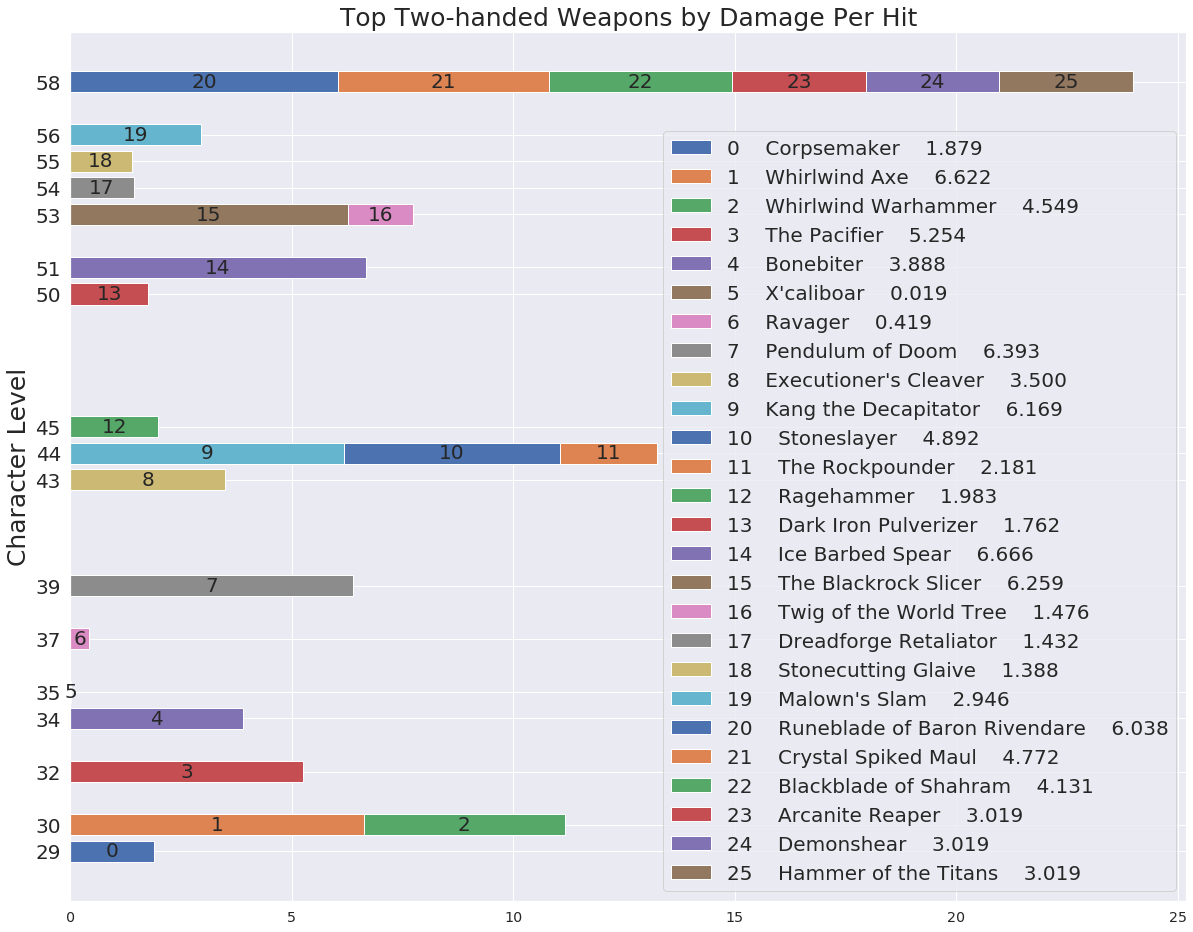

In [189]:
resultByLevelsup = pd.pivot_table(sortedWeaponData, index = ['reqlevel', 'occur'], values="levelsup")
resultByName = pd.pivot_table(sortedWeaponData, index = ['reqlevel', 'occur'], values="name",aggfunc='first')

result = pd.concat([resultByLevelsup, resultByName], axis=1).reset_index()
result.head(100)

reqlevelUnique = len(result['reqlevel'].unique())
qualifiedWeaponNumber = len(result.index)


rows = result['reqlevel']
widths = result['levelsup']
labels = result['name']
row_counts = np.arange(0, qualifiedWeaponNumber)
left = np.zeros(reqlevelUnique,)
idx = np.arange(0,qualifiedWeaponNumber)
pointer = 0
patch_handles = []

for (level, i) in zip(result['reqlevel'], idx):
    if i>0:
        if result['reqlevel'].loc[i]!= result['reqlevel'].loc[i-1]:
            pointer+=1
    idx[i] = pointer


fig, ax = plt.subplots(1, 1, figsize=(20, 16))
for (r, w, l, i, j) in zip(rows, widths, labels, idx, row_counts):
    dif = ('%.3f' % w)
    label = (str(j) + '    ' + l + '    ' + str(dif))
    patch_handles.append(ax.barh(r, w, align='center', left=left[i], label=label))

    left[i] += w
    patch = patch_handles[-1][0] 
    bl = patch.get_xy()
    x = 0.5*patch.get_width() + bl[0]
    y = 0.5*patch.get_height() + bl[1]
    ax.text(x, y, "%s" % (j), ha='center',va='center',size = 20)
    
y_pos = result['reqlevel'].unique()
ax.set_yticks(y_pos)
ax.tick_params(axis='y', labelsize=20)
ax.legend(loc = 'best',prop={'size':20})
ax.set_ylabel('Character Level', fontsize=25)
ax.set_title('Top Two-handed Weapons by Damage Per Hit', fontsize=25)